# 数据读取

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../train_set.csv', sep='\t')

In [3]:
train_df.head(10)

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
5,9,3819 4525 1129 6725 6485 2109 3800 5264 1006 4...
6,3,307 4780 6811 1580 7539 5886 5486 3433 6644 58...
7,10,26 4270 1866 5977 3523 3764 4464 3659 4853 517...
8,12,2708 2218 5915 4559 886 1241 4819 314 4261 166...
9,3,3654 531 1348 29 4553 6722 1474 5099 7541 307 ...


# 数据分析

## 文本长度分析

In [4]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


可视化：构建文本长度直方图

In [5]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Histogram of char count')

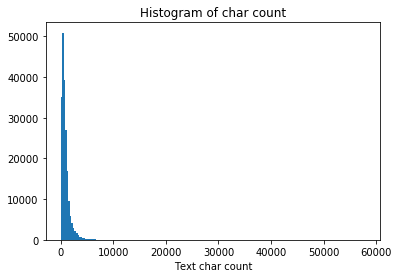

In [6]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

## 文本类别分类

Text(0.5, 0, 'category')

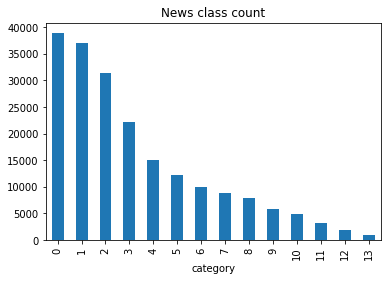

In [7]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

In [8]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

In [9]:
print('Number of words:', len(word_count))
print('Word with highest frequency: ', word_count[0])
print('Word with lowest frequency: ', word_count[-1])

Number of words: 6869
Word with highest frequency:  ('3750', 7482224)
Word with lowest frequency:  ('3133', 1)


通过词频反推标点

In [10]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

In [12]:
print(word_count[:6])

[('3750', 197997), ('900', 197653), ('648', 191975), ('2465', 177310), ('6122', 176543), ('7399', 176249)]


# 作业

In [25]:
import re
train_df['sentence_count'] = train_df['text'].apply(lambda x: len(re.split(r"3750|900|648", x)))

In [31]:
train_df['sentence_count'].describe()

count    200000.000000
mean         80.802370
std          86.955448
min           1.000000
25%          29.000000
50%          57.000000
75%         103.000000
max        3460.000000
Name: sentence_count, dtype: float64

Text(0.5, 1.0, 'Histogram of sentence count')

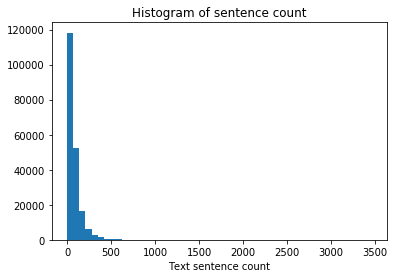

In [30]:
_ = plt.hist(train_df['sentence_count'], bins=50)
plt.xlabel('Text sentence count')
plt.title("Histogram of sentence count")